In [ ]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split

# 실제 데이터 모델링 

## Step1 : 데이터 수집

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X, y = make_classification(n_samples = 300, n_features = 2, n_redundant = 0,
                          n_informative = 1, n_clusters_per_class = 1,
                          random_state = 33)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3, shuffle = True)

In [ ]:
X_train.shape, X_test.shape

((210, 2), (90, 2))

In [ ]:
y

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
print(X)
print(y)

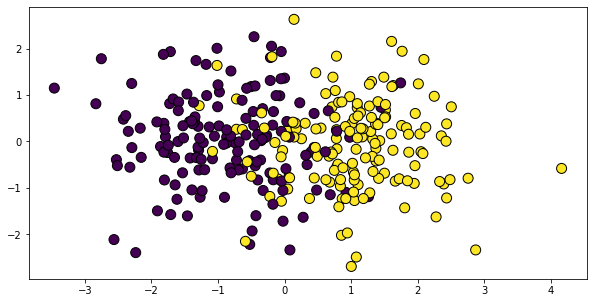

In [ ]:
# 시각화
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], c=y, s=100, edgecolors = 'k')
plt.show()

## Step 2 : 모델만들기

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
# 모델링
# 입력이 2
# layer 1 : 10개의 노드, sigmoid
# 출력 layer : 1개의 노드, sigmoid

In [ ]:
# 모델 정보 확인 
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                30        
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### Step 3. 모델 학습시키기

In [126]:
# compile

model.compile(
    loss = 'binary_crossentropy', 
    optimizer = 'adam',
    metrics = ['accuracy']
)

#또는 아래와 같이 작성

# model.compile(
#     optimizer = tf.keras.optimizers.Adam(), 
#     loss = tf.keras.losses.BinaryCrossentropy()
# )

In [127]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 100)               2600      
                                                                 
 dense_36 (Dense)            (None, 100)               10100     
                                                                 
 dense_37 (Dense)            (None, 3)                 303       
                                                                 
Total params: 13,003
Trainable params: 13,003
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fitting 
EPOCH = 100 
BATCH_SIZE = 20

history = model.fit(X_train, y_train, epochs = EPOCH, batch_size = BATCH_SIZE)

In [ ]:
#학습 히스토리 보기
history.history

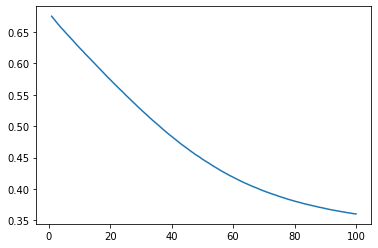

In [ ]:
# loss 시각화 
# plot을 사용해서 history안에 있는 loss를 그려보세요
# hint - history.history.__dict__

### Step 4 모델 테스트하기

In [ ]:
# 평가하기
model.evaluate(뭐가 들어갈까요?)

3/3 [==============================] - 0s 5ms/step - loss: 0.2948 - accuracy: 0.8889


[0.29477226734161377, 0.8888888955116272]

In [ ]:
# 예측하기 
y_test_pred = model.predict(???)
print(y_test_pred)

In [ ]:
# 정확도 측정
m = tf.keras.metrics.BinaryAccuracy()
m(y_test,y_test_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8666667>

## 실전 문제 1 - 유방암 예측

위스콘신 대학교에서 제공한 유방암 진단결과 데이터이다.  

feature  
* 양성(benign, 0)과 악성(malignant, 1)을 구분할 수 있는 종양의 크기, 모양 등의 다양한 특성값을 가진다.
* `mean_` : 1 ~ 10번째 feature는 특성별 평균값을 의미한다.
* `_error` : 11 ~ 20번째 feature는 특성별 표준오차(Standard Error)를 의미한다.
* `worst_` : 21 ~ 30번째까지는 각 종양의 특성들에서 제일 큰 3개의 값을 평균낸 값을 의미한다.


<a title="Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"><img width="512" alt="Micrograph of ductal carcinoma with marked nuclear pleomorphism and increased mitotic rate" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg/512px-Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg">Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni</a>, <a href="https://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>, via Wikimedia Commons

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 유방암 data를 불러온 후, cancer 변수에 담아보자.
cancer = load_breast_cancer()

# 유방암 data를 학습용과 검증용 데이터 세트로 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.3, shuffle = True)

In [ ]:
# 모델링
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
# 컴파일링
model.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy', 
    metrics = 'accuracy'
)

In [ ]:
# 학습
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
13/13 [==============================] - 2s 6ms/step - loss: 3.9781 - accuracy: 0.5553
Epoch 2/10
13/13 [==============================] - 0s 11ms/step - loss: 0.5923 - accuracy: 0.8116
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2693 - accuracy: 0.9121
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1932 - accuracy: 0.9271
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1842 - accuracy: 0.9271
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1963 - accuracy: 0.9196
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2818 - accuracy: 0.8945
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2405 - accuracy: 0.9271
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1920 - accuracy: 0.9322
Epoch 10/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2112 - accuracy: 0.9095


In [ ]:
# 정확도 측정
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


6/6 - 0s - loss: 0.3612 - accuracy: 0.9181 - 212ms/epoch - 35ms/step

테스트 정확도: 0.9181286692619324


## 실전 문제2 - 직접해보기 - Wine data

In [ ]:
from sklearn.datasets import load_wine

# wine data를 불러온 후, wine 변수에 담아보자.
wine = load_wine()

# wine data를 학습용과 검증용 데이터 세트로 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   test_size = 0.3, shuffle = True)

In [ ]:
X_train, y_train

(array([[1.221e+01, 1.190e+00, 1.750e+00, ..., 1.280e+00, 3.070e+00,
         7.180e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02],
        [1.146e+01, 3.740e+00, 1.820e+00, ..., 7.500e-01, 2.810e+00,
         5.620e+02],
        ...,
        [1.225e+01, 3.880e+00, 2.200e+00, ..., 6.500e-01, 2.000e+00,
         8.550e+02],
        [1.332e+01, 3.240e+00, 2.380e+00, ..., 5.500e-01, 1.620e+00,
         6.500e+02],
        [1.439e+01, 1.870e+00, 2.450e+00, ..., 1.020e+00, 3.580e+00,
         1.290e+03]]),
 array([1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0,
        0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 0, 2,
        2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0,
        0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 2,
        2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        2, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0]))

In [ ]:
# modeling
model = tf.keras.models.Sequential([ 
    ## ????
])
model.summary()
# input의 길이에 유의
# 중간 레이어는 2개이고 64, 32
# activation fn은 relu
# 최종 레이어의 출력은 몇 개여야 할까요?
# 최종 레이어의 activation은 무엇이어야 할까요?

In [ ]:
# compiling
model.compile(
    optimizer = #?? --> Adam을 사용하되 learning_rate를 0.001로 설정,
    loss = #??,
    metrics = 'accuracy'
)

# keras의 classification loss는 세 종류가 있습니다.
# "파이썬 딥러닝 텐서플로" 책 81p 참고
# 1. output이 한 개인데 0/1이면 binary_crossentropy
# 2. one-hot([0, 0, 0, 1, 0])로 되어 있다면 categorical_crossentropy
# 3. label encoding 되어 있다면 sparse_categorical_crossentropy 

In [ ]:
# fitting
model.fit(X_train, y_train, epochs = 50, validation_split = 0.1, 
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

# callback에 대해서 알아봅시다

Epoch 1/30
4/4 [==============================] - 2s 6ms/step - loss: 45.6652 - sparse_categorical_accuracy: 0.3710
Epoch 2/30
4/4 [==============================] - 0s 6ms/step - loss: 14.6524 - sparse_categorical_accuracy: 0.3145
Epoch 3/30
4/4 [==============================] - 0s 6ms/step - loss: 11.9114 - sparse_categorical_accuracy: 0.3065
Epoch 4/30
4/4 [==============================] - 0s 6ms/step - loss: 15.1272 - sparse_categorical_accuracy: 0.3387
Epoch 5/30
4/4 [==============================] - 0s 8ms/step - loss: 7.6917 - sparse_categorical_accuracy: 0.3226
Epoch 6/30
4/4 [==============================] - 0s 5ms/step - loss: 5.5683 - sparse_categorical_accuracy: 0.3468
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 3.9882 - sparse_categorical_accuracy: 0.4274
Epoch 8/30
4/4 [==============================] - 0s 5ms/step - loss: 3.3744 - sparse_categorical_accuracy: 0.3387
Epoch 9/30
4/4 [==============================] - 0s 7ms/step - loss: 2.2823

In [ ]:
# accuracy
test_loss, test_acc = model.evaluate(
                                      #????
                                    )


2/2 - 0s - loss: 0.6606 - sparse_categorical_accuracy: 0.7407 - 237ms/epoch - 119ms/step

테스트 정확도: 0.7407407164573669


## 실전 문제3 - Housing Data (회귀-regression)

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x_data = housing.data
y_data = housing.target

In [ ]:
# 랜덤하게 학습데이터와 테스트 데이터를 분리하세요
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_data, random_state = 42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [ ]:
# 정규화 
from sklearn.preprocessing import StandardScaler

#X_data에 standardScaler를 적용해 봅시다.
#어떻게 하면 되나요?

In [ ]:
# 모델링

#여러분이 자유롭게 dense layer를 쌓아보세요
#단, 마지막 레이어는 어떻게 만들어야 하고 activation은 무엇을 사용해야 하나요?
#회귀 모델의 최종 레이어에 사용하기에 적합한 act fn은 무엇일까요?

In [ ]:
# 컴파일링

#여러분이 원하는 optimizer를 사용해 보세요
#회귀에서 loss는 무엇을 사용해야 하나요?
#metric은 하나만 사용하지 않아도 됩니다. 여러개의 metric을 적용해 봅시다

In [ ]:
# 모델 정보 확인 
model.summary()

In [ ]:
# fitting
#validation_split을 0.1로 지정해서 학습 시켜봅시다.
#나중에 학습 커브를 그려야 하기 때문에 history에 fit 결과를 저장해야 합니다.

Epoch 1/30
516/516 [==============================] - 3s 3ms/step - loss: 0.8630 - mae: 0.6051 - mse: 0.8630
Epoch 2/30
516/516 [==============================] - 1s 2ms/step - loss: 0.3950 - mae: 0.4447 - mse: 0.3950
Epoch 3/30
516/516 [==============================] - 1s 2ms/step - loss: 0.3749 - mae: 0.4289 - mse: 0.3749
Epoch 4/30
516/516 [==============================] - 1s 2ms/step - loss: 0.3493 - mae: 0.4169 - mse: 0.3493
Epoch 5/30
516/516 [==============================] - 1s 2ms/step - loss: 0.3499 - mae: 0.4089 - mse: 0.3499
Epoch 6/30
516/516 [==============================] - 1s 2ms/step - loss: 0.3244 - mae: 0.3995 - mse: 0.3244
Epoch 7/30
516/516 [==============================] - 1s 2ms/step - loss: 0.3526 - mae: 0.4018 - mse: 0.3526
Epoch 8/30
516/516 [==============================] - 1s 2ms/step - loss: 0.3134 - mae: 0.3907 - mse: 0.3134
Epoch 9/30
516/516 [==============================] - 1s 2ms/step - loss: 0.3168 - mae: 0.3874 - mse: 0.3168
Epoch 10/30
516/516

In [ ]:
# evaluate

129/129 - 0s - loss: 0.2782 - mae: 0.3569 - mse: 0.2782 - 290ms/epoch - 2ms/step


[0.27817124128341675, 0.35687127709388733, 0.27817124128341675]

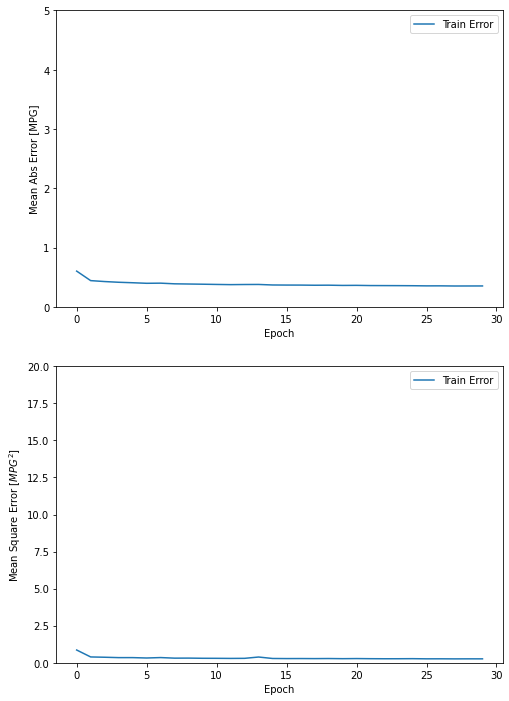

In [ ]:
# plot loss and MSE 
# 학습이 제대로 되었는지 확인해 봅시다

# 직접 해보기 - 의류 이미지 분류하기

#### CNN을 배우지 않았기 때문에 image를 flatten하여 MLP(Dense)로 구현해보세요

### 1. 데이터셋 로드 및 탐색
 - fashion_mnist : 의류 사진 
    - 크기 : 28*28 (흑백)
    - train : 6만/ test : 1만
    - 라벨 : 10가지('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat' , 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [ ]:

fashion = datasets.fashion_mnist
fashion_data = fashion.load_data()
fashion_data

In [ ]:
len(fashion_data)

2

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_data 

In [ ]:
train_imgs.shape, train_labels.shape, test_imgs.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
import numpy as np
n_class = np.unique(train_labels).shape[0]
n_class

10

**< dataset summary >**  
n_trainset = 60,000 / n_testset = 10,000  
1 image shape = 28 x 28 / 1 label shape = 1

In [ ]:
train_imgs[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

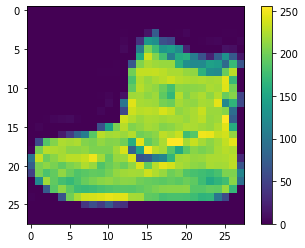

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.show()

In [ ]:
train_labels[0]

9

데이터셋 안에 label의 이름이 없기 때문에, 직접 넣어줍니다.

In [ ]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
label_names[train_labels[0]]

'Ankle boot'

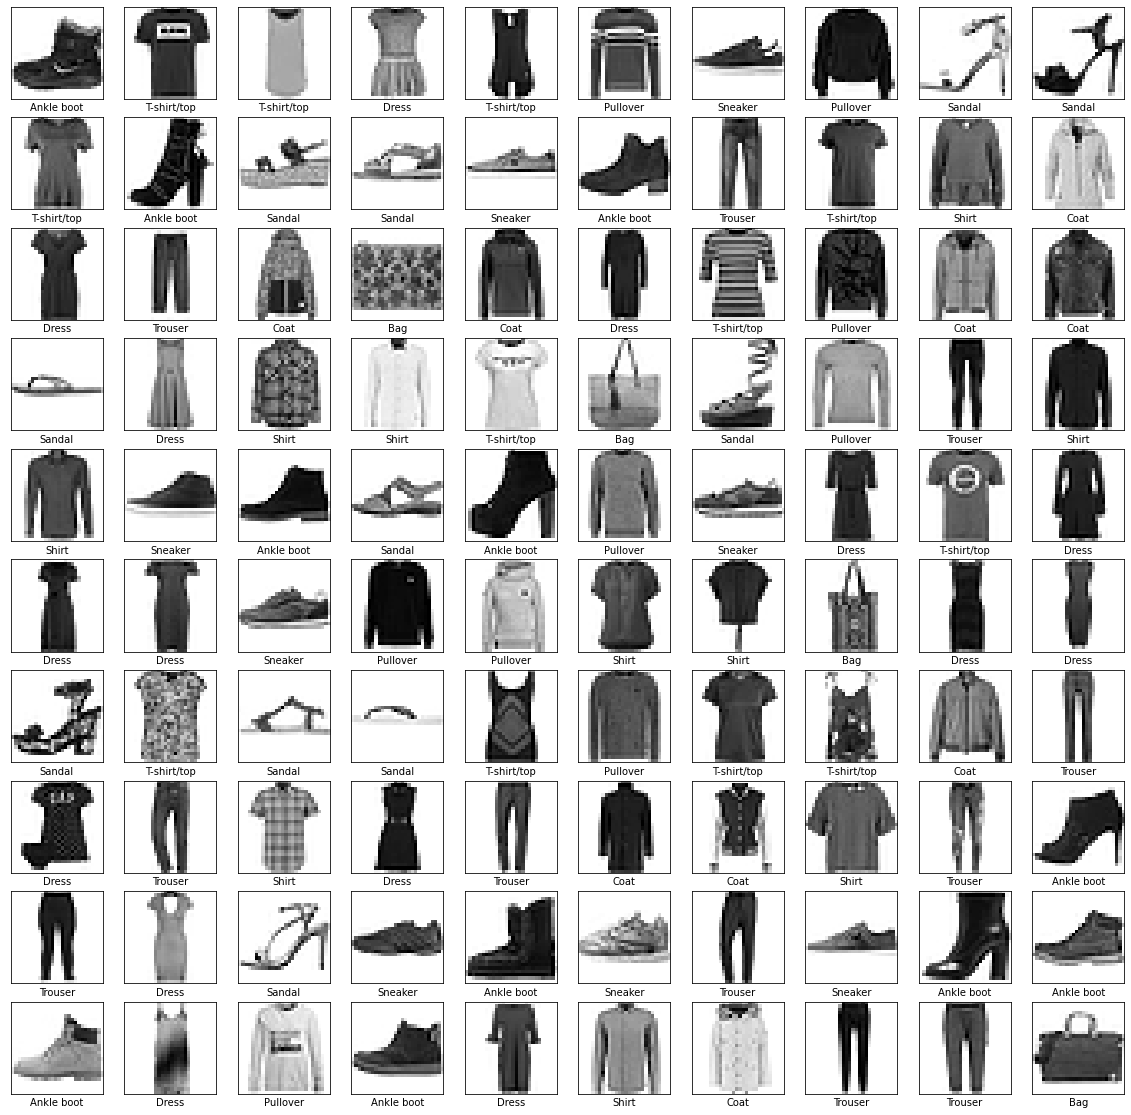

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[train_labels[i]])
plt.show()

### 2. 모델 구축 
- tf.keras.Sequential()
- 모델을 구축하는 가장 기본적인 방법으로 아래 두가지 방법이 있다.
1. model = tf.keras.Sequntial([ 입력층 , 은닉1층 , 은닉2층 , ... 출력층 ]) 와 같이, 리스트 형식으로 각 층을 묶어서 선언한다.
2. model = tf.keras.Sequential() 선언 후, model.add()를 이용해 한 층씩 쌓아준다.
  
- 입력층에서 가장 기본적인 방법은 Flatten()을 이용하여 1차원 형태로 받는 것이다.
    - Flatten()에서는 입력받을 데이터의 input_shape을 설정해줘야 한다.
- 각 층의 가장 기본적인 형태는 Dense()를 이용하여 "완전연결계층"형태로 구성하는 것이다.
    - Dense()에서는 먼저 뉴런의 개수(노드의 개수)를 설정해줘야 한다.
    - 활성화 함수 종류, 초기화방법 등을 설정해줄 수 있다.


In [ ]:
# modeling



### 3. 모델 컴파일
모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 컴파일 단계에서 추가됩니다:

- 옵티마이저(Optimizer) : 모델의 업데이트 방법(최적화 방법) 설정
    - adam, rmsprop, adagrad, sgd etc.
- 손실 함수(Loss function) : 훈련 시, 오차 측정 방식 설정  
    - binary_crossentropy : 이진 분류 시 사용
    - categorical_crossentropy : 다중 분류 시 one hot encoding label일 때 사용 
    - sparse_categorical_crossentropy : 다중 분류 시 정수형 label일 때 사용
- 지표(Metrics) : 훈력 시, 학습데이터과 검증데이터의 평가 지표 설정
    - 기본적으로 리스트 형태로 받도록 설정
    - accuracy, auc, precision, recall etc.
  
기본적으로 문자열 형태로 지정해주지만, 직접 함수를 지정해줄 수 있다.

In [ ]:
# compiling



### 4. 모델 훈련
신경망 모델을 훈련하는 단계는 다음과 같습니다:  
.  
훈련 데이터를 모델에 주입합니다-이 예에서는 train_images와 train_labels 배열입니다.  
모델이 train img와 train label의 관계를 학습힙니다.
- epochs : 학습데이터셋 학습 반복 횟수 
    - 책 몇 epoch 돌렸어? (책 몇번 봤어?)  
- batch_size : 1회 업데이트 시 학습하는 데이터 량
    - 한번 공부할 때 batch size가 어떻게 돼? (한번 공부할 때 몇 페이지씩 봐?)
- validation_data : 훈련 단계에서 검증할 데이터셋
- verbose : 시각화 방식

In [ ]:
# fitting



Epoch 1/20
600/600 [==============================] - 5s 3ms/step - loss: 2.3124 - accuracy: 0.7757 - val_loss: 0.5927 - val_accuracy: 0.8130
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.4739 - accuracy: 0.8407 - val_loss: 0.5432 - val_accuracy: 0.8207
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.4060 - accuracy: 0.8563 - val_loss: 0.5088 - val_accuracy: 0.8325
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3758 - accuracy: 0.8653 - val_loss: 0.4192 - val_accuracy: 0.8553
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3503 - accuracy: 0.8720 - val_loss: 0.4276 - val_accuracy: 0.8526
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8769 - val_loss: 0.4727 - val_accuracy: 0.8327
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3350 - accuracy: 0.8788 - val_loss: 0.4156 - val_accuracy: 0.8642
Epoch 

### 모델 평가

In [ ]:
# accuracy



313/313 - 1s - loss: 0.3713 - accuracy: 0.8736 - 750ms/epoch - 2ms/step

테스트 정확도: 0.8736000061035156


## 직접 해보기 : 손글씨 이미지 분류하기

##### 여러번 사용한 데이터입니다. 이번에는 다양한 학습 기법과 layer를 사용해서 모델을 구축하고 학습한 다음 예측(predict)해 보세요

In [ ]:
mnist = datasets.mnist
mnist_data = mnist.load_data()
mnist_data

11501568/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist_data 

In [ ]:
label_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

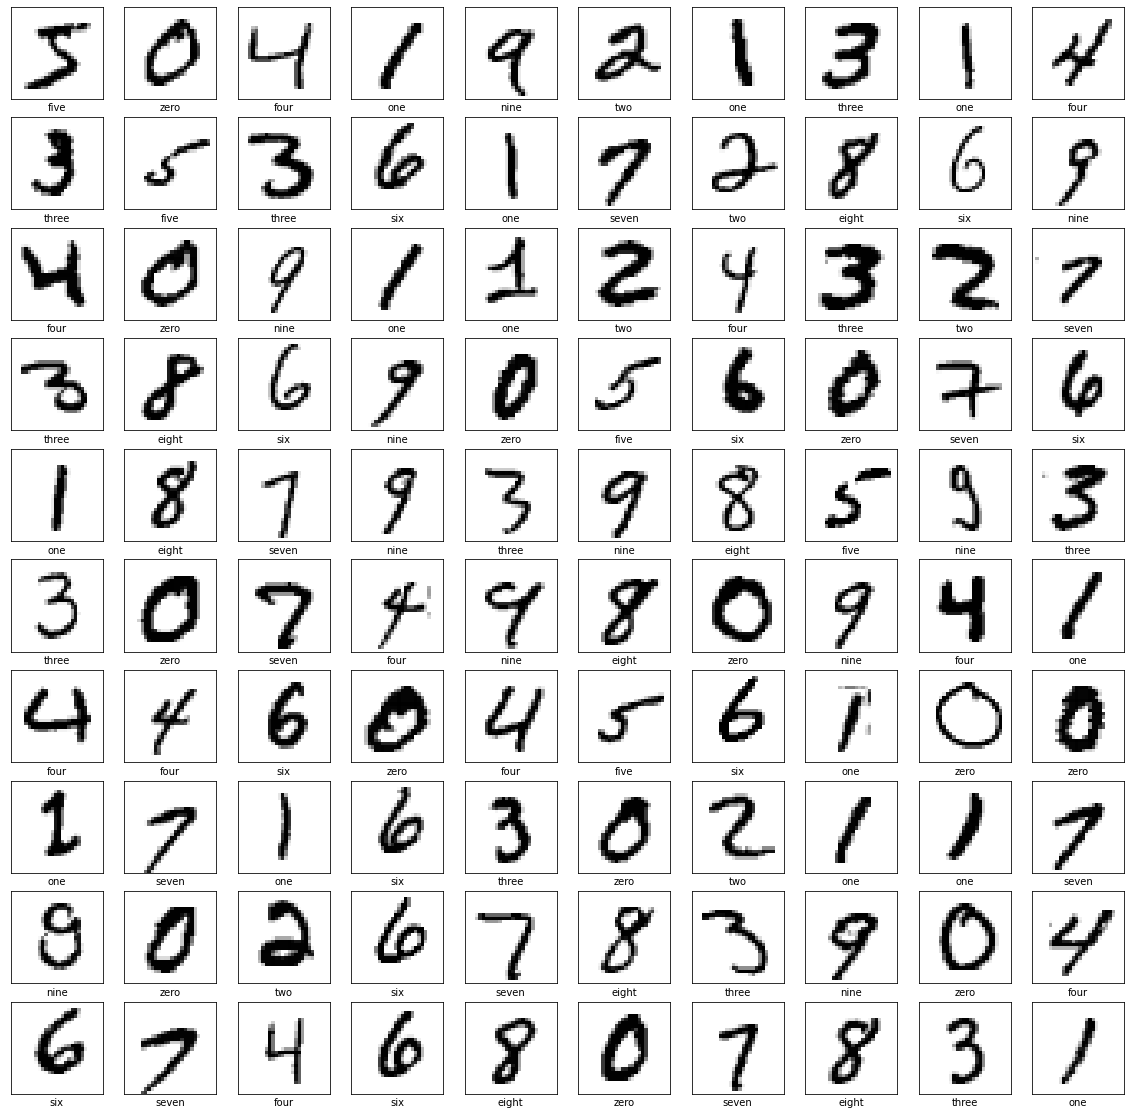

In [ ]:
# 시각화 


In [ ]:
# 위의 패션 예제와 같이 층을 쌓아보자.


In [ ]:
# 컴파일링



In [ ]:
# 학습



Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 1.3352 - accuracy: 0.8963 - val_loss: 0.3064 - val_accuracy: 0.9313
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1955 - accuracy: 0.9518 - val_loss: 0.2046 - val_accuracy: 0.9524
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1259 - accuracy: 0.9650 - val_loss: 0.2194 - val_accuracy: 0.9509
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.1052 - accuracy: 0.9706 - val_loss: 0.1541 - val_accuracy: 0.9631
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0893 - accuracy: 0.9741 - val_loss: 0.1974 - val_accuracy: 0.9559
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0867 - accuracy: 0.9755 - val_loss: 0.1535 - val_accuracy: 0.9645
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9785 - val_loss: 0.1455 - val_accuracy: 0.9675
Epoch 

In [ ]:
# 정확도

313/313 - 1s - loss: 0.4996 - accuracy: 0.9689 - 671ms/epoch - 2ms/step

테스트 정확도: 0.9689000248908997
